# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

---
author: "Ben Kessler"
toc: true
self-contained: true
echo: true
---

In [4]:
# Import the titanic dataset here
import pandas as pd
data = pd.read_csv("https://dlsun.github.io/pods/data/titanic.csv")
data

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


In [36]:
pd.unique(data["class"])

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [25]:
# Code here
p_data = data[data.loc[:, "class"].isin(["3rd", "2nd", "1st"])]
p_data.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


In [37]:
p_joint = pd.crosstab(p_data["class"], [p_data["embarked"]])
p_joint

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [56]:
# Code here
p_cond_class = pd.crosstab(p_data["class"], p_data["embarked"], normalize="index")
p_cond_embark = pd.crosstab(p_data["embarked"], p_data["class"], normalize="index")
print(p_cond_class, "\n", p_cond_embark)

embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756 
 class          1st       2nd       3rd
embarked                              
B         0.333333  0.666667  0.000000
C         0.527675  0.095941  0.376384
Q         0.024390  0.056911  0.918699
S         0.191466  0.268053  0.540481


The proportion of 3rd class passengers that embarked at Southampton is 69.7%.
The proportion of Southampton Passengers who were in 3rd class is 54.1%.

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [110]:
long_df = p_cond_embark.stack().reset_index()
long_df.columns = ["embarked", "class", "probability"]
long_df

,embarked,class,probability
0,B,1st,0.333333
1,B,2nd,0.666667
2,B,3rd,0.000000
3,C,1st,0.527675
4,C,2nd,0.095941
5,C,3rd,0.376384
6,Q,1st,0.024390
7,Q,2nd,0.056911
8,Q,3rd,0.918699
9,S,1st,0.191466


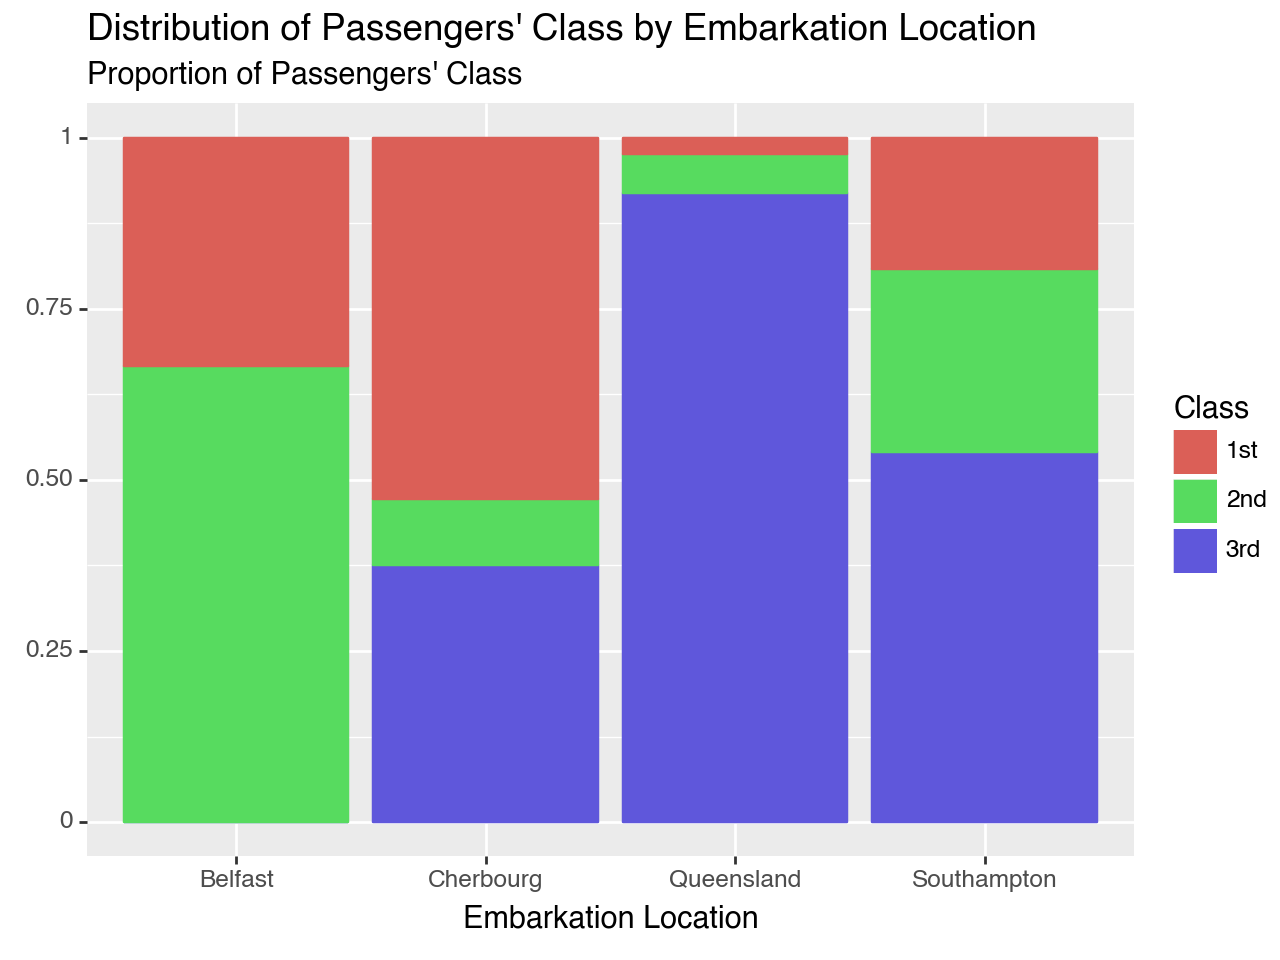

<Figure Size: (640 x 480)>

In [121]:
# Code here
from plotnine import ggplot, aes, geom_bar, labs, scale_x_discrete
(ggplot(long_df, aes(x = "embarked", y = "probability", color = "class", fill = "class")) +
    geom_bar(stat = "identity") + 
    labs(
        x = "Embarkation Location",
        y = "",
        subtitle = "Proportion of Passengers' Class",
        title = "Distribution of Passengers' Class by Embarkation Location",
        color = "Class",
        fill = "Class"
    ) +
    scale_x_discrete(
        labels = {"B": "Belfast", "C": "Cherbourg", "Q": "Queensland", "S": "Southampton"}
    )
)